<a href="https://colab.research.google.com/github/Alexandre77777/neural_networks/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%963_%D0%A0%D0%B0%D1%81%D1%88%D0%B8%D1%80%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D0%BE%D0%B7%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9_%D0%BF%D1%80%D0%B8_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8_%D0%B8_%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D0%B4%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%B8%D0%B8_%D1%81_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%D1%8E_%D0%BA%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8_%D0%B8_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическое занятие №3. Расширение возможностей при обучении и взаимодействии с моделью: колбэки и Gradio**

## Произведем рефакторинг основных решений из предыдущего занятия:

# **1. Обучение модели ИНС для предсказывания цен на недвижимость. Решение задачи регрессии**


Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
print(X.describe())  # Вывод статистики по X

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [3]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [4]:
print(pd.DataFrame(y).describe())  # Вывод статистики по y

                  0
count  20640.000000
mean       2.068558
std        1.153956
min        0.149990
25%        1.196000
50%        1.797000
75%        2.647250
max        5.000010


#### 1.1. Разделяем данные на обучающую и тестовую выборку

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Проектируем архитектуру для этой задачи

In [6]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(16, input_shape=(8,), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [7]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [8]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
516/516 [==============================] - 3s 4ms/step - loss: 5.6336 - mae: 2.0725
Epoch 2/10
516/516 [==============================] - 4s 7ms/step - loss: 5.6336 - mae: 2.0725
Epoch 3/10
516/516 [==============================] - 3s 6ms/step - loss: 5.6336 - mae: 2.0725
Epoch 4/10
516/516 [==============================] - 2s 4ms/step - loss: 5.6336 - mae: 2.0725
Epoch 5/10
516/516 [==============================] - 3s 5ms/step - loss: 5.6336 - mae: 2.0725
Epoch 6/10
516/516 [==============================] - 3s 5ms/step - loss: 5.6336 - mae: 2.0725
Epoch 7/10
516/516 [==============================] - 2s 5ms/step - loss: 5.6336 - mae: 2.0725
Epoch 8/10
516/516 [==============================] - 1s 3ms/step - loss: 5.6336 - mae: 2.0725
Epoch 9/10
516/516 [==============================] - 1s 3ms/step - loss: 5.6336 - mae: 2.0725
Epoch 10/10
516/516 [==============================] - 2s 4ms/step - loss: 5.6336 - mae: 2.0725


#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Если модель обучается плохо, необходимо внести изменения в работу.

Сеть обучается плохо, так как данные не масштабированы.

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()  # Стандартизация по среднему и стандартному отклонению
scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [11]:
X_train

array([[0.25783782, 0.09803922, 0.04875074, ..., 0.0046041 , 0.1370882 ,
        0.67729084],
       [0.26826527, 1.        , 0.03176219, ..., 0.00429433, 0.55154091,
        0.19023904],
       [0.23678294, 0.49019608, 0.02709659, ..., 0.00338447, 0.1370882 ,
        0.63247012],
       ...,
       [0.18605261, 0.58823529, 0.01981433, ..., 0.00173858, 0.4293305 ,
        0.2440239 ],
       [0.35389857, 0.64705882, 0.02619004, ..., 0.00250076, 0.11477152,
        0.63944223],
       [0.06126122, 0.2745098 , 0.02185816, ..., 0.00448481, 0.02763018,
        0.87549801]])

In [12]:
model = Sequential([
    Dense(16, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='sgd', loss='mse', metrics='mae')

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
516/516 [==============================] - 2s 3ms/step - loss: 0.9298 - mae: 0.7362 - val_loss: 0.6189 - val_mae: 0.5999
Epoch 2/10
516/516 [==============================] - 2s 4ms/step - loss: 0.5746 - mae: 0.5601 - val_loss: 0.5770 - val_mae: 0.5645
Epoch 3/10
516/516 [==============================] - 5s 9ms/step - loss: 0.5477 - mae: 0.5424 - val_loss: 0.5572 - val_mae: 0.5548
Epoch 4/10
516/516 [==============================] - 1s 2ms/step - loss: 0.5332 - mae: 0.5327 - val_loss: 0.5441 - val_mae: 0.5513
Epoch 5/10
516/516 [==============================] - 1s 2ms/step - loss: 0.5246 - mae: 0.5269 - val_loss: 0.5550 - val_mae: 0.5059
Epoch 6/10
516/516 [==============================] - 1s 2ms/step - loss: 0.5141 - mae: 0.5207 - val_loss: 0.5202 - val_mae: 0.5015
Epoch 7/10
516/516 [==============================] - 1s 2ms/step - loss: 0.5071 - mae: 0.5154 - val_loss: 0.5096 - val_mae: 0.5006
Epoch 8/10
516/516 [==============================] - 1s 2ms/step - loss: 0.

#### 1.6. Делаем предсказания на тестовых данных

In [13]:
preds = model.predict(X_test)

129/129 [==============================] - 0s 1ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

0.5731053387493865

#### 1.8. Строим график обучения

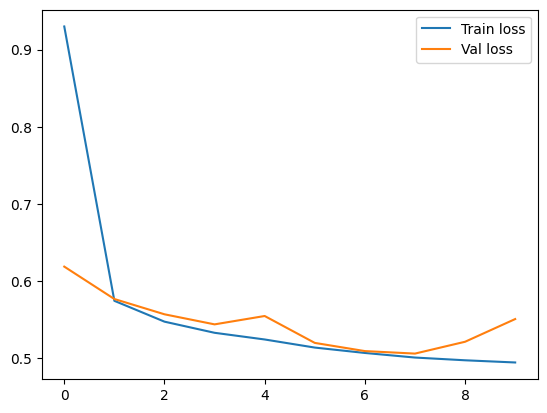

In [15]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

## Проверка обученной модели пользовательскими данными

In [16]:
def preprocess_input(features, scale_model="scaler.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [19]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

## Библиотека Gradio

**Документация Gradio:** [https://gradio.app/docs/](https://gradio.app/docs/)

  [**Примеры**](https://www.gradio.app/guides)


**Gradio** – это Python-библиотека с открытым исходным кодом, которая позволяет создавать веб-интерфейсы для ваших ML-моделей, API или произвольных Python-функций.








Установка Gradio:

In [ ]:
!pip install gradio

In [20]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="Median Income", minimum=0.5, maximum=15, step=0.1, value=8.3252),
        gr.Slider(label="Median House Age", minimum=1, maximum=50, step=1, value=41.0),
        gr.Slider(label="Total Rooms", minimum=1, maximum=50, step=0.01, value=6.984127),
        gr.Slider(label="Total Bedrooms", minimum=1, maximum=15, step=0.01, value=1.023810),
        gr.Slider(label="Population", minimum=1, maximum=15000, step=1, value=322.0),
        gr.Slider(label="Ocean Proximity", minimum=0, maximum=1, step=0.1, value=2.555556),
        gr.Slider(label="Latitude", minimum=32.5, maximum=42.5, step=0.1, value=37.88),
        gr.Slider(label="Longitude", minimum=-118, maximum=-114, step=0.1, value=-122.23),
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://13368118f20bab2051.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **2. Обучение модели ИНС для классификации изображений, используя свой датасет**

## Устанавливаем зависимости:

In [23]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

## Загружаем набор данных:

In [21]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.ru/d/re_mUSlRgTC7FA) -o Cats_Dogs_Pandas.zip
! unzip -qq Cats_Dogs_Pandas.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  189M  100  189M    0     0  15.2M      0  0:00:12  0:00:12 --:--:-- 19.6M


## Указываем путь к набору данных:

In [24]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Cats_Dogs_Pandas/animals")))
random.shuffle(imagePaths)

## Загружаем набор данных и формируем общую выборку:

In [25]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [26]:
compression_size = 32

data, labels = load_images(imagePaths, compression_size)

## Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [27]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [29]:
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels,
                                                  test_size=0.25,
																									random_state=42)

Преобразуем метки классов в формат One-Hot Encoding:

   

```python
    "cats" ->  [1, 0, 0]
    "dogs" ->  [0, 1, 0]
    "panda" -> [0, 0, 1]
```



In [30]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

## Создание модели:

#### Определим архитектуру модели с помощью Keras:

Если значение параметра ***compression_size = 32***, то входной слой должен иметь 32\*32*3 = 3072 входных нейрона

Вычислим динамически параметры входного слоя, чтобы при изменении параметров сжатия, не пришлось вносисть изменений в архитуру модели:

In [31]:
input_shape = (compression_size * compression_size * 3,)

In [32]:
model = Sequential()
model.add(Dense(1024, input_shape=input_shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### Установим значение параметров скорости обучения и общего числа эпох


In [33]:
INIT_LR = 0.0000005
EPOCHS = 100

#### Компилируем модель, используя Adam как оптимизатор и категориальную кросс-энтропию в качестве функции потерь (для бинарной классификации следует использовать binary_crossentropy):

In [34]:
opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,
																					metrics=["accuracy"])

## Обучение модели искусственной нейронной сети:

#### Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

- **Колбэки** (или обратные вызовы) в Keras - это объекты, которые позволяют выполнять действия в различных точках жизненного цикла обучения, оценки и предсказания модели.

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### Запустим процесс обучения модели:

In [36]:
H = model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/100
23/23 [==============================] - 5s 137ms/step - loss: 1.0987 - accuracy: 0.3680 - val_loss: 1.0946 - val_accuracy: 0.3613
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 2s 85ms/step - loss: 1.0904 - accuracy: 0.3782 - val_loss: 1.0878 - val_accuracy: 0.3733
Epoch 3/100
23/23 [==============================] - 2s 76ms/step - loss: 1.0824 - accuracy: 0.3920 - val_loss: 1.0805 - val_accuracy: 0.3733
Epoch 4/100
23/23 [==============================] - 2s 81ms/step - loss: 1.0748 - accuracy: 0.3978 - val_loss: 1.0740 - val_accuracy: 0.3867
Epoch 5/100
23/23 [==============================] - 2s 88ms/step - loss: 1.0675 - accuracy: 0.4138 - val_loss: 1.0677 - val_accuracy: 0.3933
Epoch 6/100
23/23 [==============================] - 2s 84ms/step - loss: 1.0604 - accuracy: 0.4244 - val_loss: 1.0617 - val_accuracy: 0.4080
Epoch 7/100
23/23 [==============================] - 3s 112ms/step - loss: 1.0536 - accuracy: 0.4338 - val_loss: 1.0558 - val_accuracy: 0.4187
Epoch 8/100
23/23 [==============================] - 3s 114ms/step - loss: 1.0470 - accuracy: 0.4431 - val_loss: 1.0506 - val_accuracy: 0.4280
Epoch 9/100
23/2

#### Загружаем лучшую модель:

In [37]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

## Оценка точности:

#### Выведем отчет классификации

In [38]:
predictions = model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

24/24 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

        cats       0.49      0.49      0.49       247
        dogs       0.49      0.47      0.48       258
       panda       0.71      0.72      0.71       245

    accuracy                           0.56       750
   macro avg       0.56      0.56      0.56       750
weighted avg       0.56      0.56      0.56       750



##### Интерпретация отчета классификации (classification_report):

**1. Точность (precision):**

* Доля правильно классифицированных объектов.
* Чем выше, тем лучше.

**2. Полнота (recall):**

* Доля объектов каждого класса, которые были правильно классифицированы.
* Чем выше, тем лучше модель "улавливает" объекты каждого класса.

**3. F1-мера (f1-score):**

* Гармоническое среднее между точностью и полнотой.
* Учитывает баланс между точностью и полнотой.
* Чем выше, тем лучше.

**4. Поддержка (support):**

* Доля объектов в каждом классе.

**5. Macro avg:**

* Среднее арифметическое значений метрик по классам.**
* Не учитывает количество объектов в каждом классе.**
* Полезно для оценки производительности модели на классах с малым числом объектов.

**6. Weighted avg:**

* Среднее арифметическое значений метрик по классам, взвешенное по количеству объектов в каждом классе.
* Учитывает влияние классов с большим числом объектов.
* Полезно для оценки производительности модели на классах с несбалансированными наборами данных.

#### Выведем матрицу ошибок

Матрица ошибок (confusion matrix) - это таблица,
которая показывает, сколько объектов каждого класса
было правильно и неправильно классифицировано.

24/24 [==============================] - 0s 9ms/step


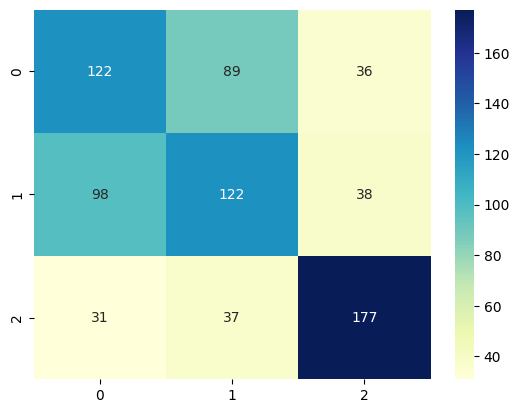

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

##### Интерпретация матрицы ошибок:

**Пример:**

```
    |   |   |   |   |
    |---|---|---|---|
    | 10 | 2 | 0 | 0 |  # 10 объектов класса 1 правильно классифицированы
    | 1 | 11 | 1 | 0 |  # 11 объектов класса 2 правильно классифицированы
    | 0 | 0 | 12 | 1 |  # 12 объектов класса 3 правильно классифицированы
    | 0 | 0 | 1 | 9 |   # 9 объектов класса 4 правильно классифицированы
    |---|---|---|---|
```

**В данном примере:**

* Модель хорошо классифицирует все 4 класса.
* Наибольшее количество ошибок (2) допущено при классификации объектов класса 1.


**Строки:**

* **Истинные классы:** показывают, какой класс на самом деле был у объектов.

**Столбцы:**

* **Предсказанные классы:** показывают, как модель классифицировала объекты.

**Диагонали:**

* **Правильные предсказания:** чем больше значения, тем лучше модель классифицирует данный класс.

**Недиагональные элементы:**

* **Ошибочные предсказания:**
    * **Строка i, столбец j:** модель ошибочно предсказала класс j для объектов класса i.
    * Чем больше значение, тем чаще модель ошибается.



#### Отобразим график обучения

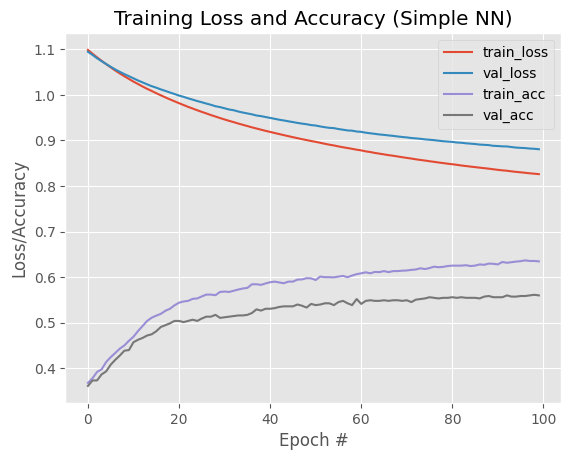

In [40]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### Сохранение модели и меток классов:

In [42]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [43]:
model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Проверка обученной модели пользовательскими данными:

In [ ]:
!pip install gradio

### Импортируем необходимые библиотеки

In [44]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

### Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [45]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

### Определим функцию для осуществления прогноза по загруженной модели:

In [46]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [47]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/Cats_Dogs_Pandas/images/cat.jpg",
              "/content/Cats_Dogs_Pandas/images/dog.jpeg",
              "/content/Cats_Dogs_Pandas/images/panda.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d8a6c232010fbfff4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
